In [1]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [2]:
# đọc dữ liệu
with open('hand_written_az.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []
    
    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)

In [3]:
print(rows[100000])

['11', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '95', '155', '150', '67', '11', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '208', '255', '255', '218', '68', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '208', '255', '255', '226', '71', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [4]:
print(np.shape(rows[100000]))
# result: (785,) 

(785,)


['2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '60', '162', '255', '255', '255', '255', '255', '255', '224', '100', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '46', '77', '233', '255', '255', '255', '236', '246', '255', '255', '255', '255', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '255', '255', '255', '255', '255', '167', '65', '116', '25

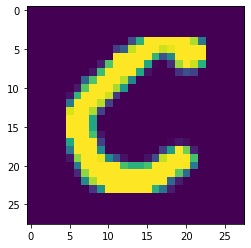

In [5]:
# print 1 number
letter = rows[30000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)

print(letter)
plt.imshow(x)

In [6]:
train_data = [] # dữ liệu training
train_label = [] # label của chúng
arr = rows[:]
for letter in arr:
    if (letter[0] == '0') or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
        x = np.array([int(j) for j in letter[1:]])
        x = x.reshape(28, 28)
        train_data.append(x)
        train_label.append(int(letter[0]))
    else:
        break

In [7]:
# Shufftle data
import random

shuffle_order = list(range(56081))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

In [8]:
print(train_data.shape)
train_x = train_data[:50000]
train_y = train_label[:50000]

val_x = train_data[50000:53000]
val_y = train_label[50000:53000]

test_x = train_data[53000:]
test_y = train_label[53000:]

(56081, 28, 28)


In [9]:
# Build model
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers import regression
from tflearn.data_utils import to_categorical

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [10]:
BATCH_SIZE = 32
IMG_SIZE = 28
N_CLASSES = 4
LR = 0.001
N_EPOCHS = 50

In [11]:
tf.reset_default_graph()

network = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1]) #1

network = conv_2d(network, 32, 3, activation='relu') #2
network = max_pool_2d(network, 2) #3

network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)

network = fully_connected(network, 1024, activation='relu') #4
network = dropout(network, 0.8) #5

network = fully_connected(network, N_CLASSES, activation='softmax')#6
network = regression(network)

model = tflearn.DNN(network) #7

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [12]:
train_x = train_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
val_x = val_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_x = test_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
original_test_y = test_y # được sử dụng để test ở bước sau

train_y = to_categorical(train_y, N_CLASSES)
val_y = to_categorical(val_y, N_CLASSES)
test_y = to_categorical(test_y, N_CLASSES)


In [14]:
# train
model.fit(train_x, train_y, n_epoch=N_EPOCHS, validation_set=(val_x, val_y), show_metric=True)

Training Step: 39099  | total loss: 0.00065 | time: 78.644s
| Adam | epoch: 050 | loss: 0.00065 - acc: 0.9997 -- iter: 49984/50000
Training Step: 39100  | total loss: 0.00058 | time: 80.162s
| Adam | epoch: 050 | loss: 0.00058 - acc: 0.9997 | val_loss: 0.00060 - val_acc: 0.9997 -- iter: 50000/50000
--


In [15]:
# Save model
model.save('hand_written_reg_model.tflearn')

INFO:tensorflow:E:\01_AI_ML\hand_written_reg_model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
# Load model which is saved
model.load('/content/drive/new_hr/hr.tflearn')

In [16]:
# dự đoán với tập dữ liệu test
test_logits = model.predict(test_x)
#lấy phần tử có giá trị lớn nhất 
test_logits = np.argmax(test_logits, axis=-1)

In [17]:
print(np.sum(test_logits == original_test_y) / len(test_logits))
#result: 0.9964297306069458

0.9990262901655307


In [18]:
def imgPreprocess(img):
    im = cv2.imread(img,mode='RGB')
    return im

In [19]:
result = model.predict(imgPreprocess("chuB.png"))

TypeError: 'mode' is an invalid keyword argument for imread()